# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [27]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [28]:
# Your EDA code here
df['job_title'] = df['job_title'].astype('category')
uniqueJob = df['job_title'].nunique()
print(f'1. There are {uniqueJob} unique job titles.')

1. There are 93 unique job titles.


In [29]:
print('2. Average salary per working year:')
df.groupby('work_year')['salary_in_usd'].mean().round(2)

2. Average salary per working year:


work_year
2020     92302.63
2021     94087.21
2022    133379.51
2023    148954.56
Name: salary_in_usd, dtype: float64

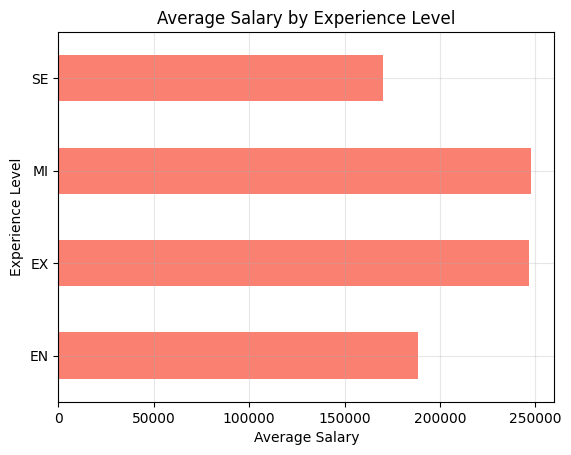

In [30]:
avg_salary_by_exp.plot(
    kind='barh',
    x='experience_level',
    y='salary',
    color='salmon',  # you can change this to 'green', '#FF5733', (0.2,0.4,0.6), etc.
    legend=False
)

plt.xlabel('Average Salary')
plt.ylabel('Experience Level')
plt.title('Average Salary by Experience Level')
plt.grid(alpha=0.3)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [23]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [24]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [25]:
df_2024 = pd.DataFrame({
    'work_year': [2024, 2024, 2024],
    'experience_level': ['EN', 'MI', 'SE'],   # Entry, Mid, Senior
    'employment_type': ['FT', 'CT', 'PT']     # Full-time, Contract, Part-time
})

# Encode using same encoders fitted earlier
df_2024['experience_level_encoded'] = exp_encoder.transform(df_2024['experience_level'])
df_2024['employment_type_encoded'] = employment_encoder.transform(df_2024['employment_type'])

# Match feature set
X_2024 = df_2024[features]

# Predict salaries
df_2024['predicted_salary_2024'] = model.predict(X_2024)

df_2024


,work_year,experience_level,employment_type,experience_level_encoded,employment_type_encoded,predicted_salary_2024
0,2024,EN,FT,0,2,111694.914909
1,2024,MI,CT,2,0,152239.954247
2,2024,SE,PT,3,3,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<p>1. Does your model make reasonable predictions? Why or why not?
    <br><b>Yes, the predictions are generally reasonable because they fall within normal salary ranges, but their accuracy still depends on how well the model captured salary patterns.</b></p>

<p>2. What are the limitations of using only `work_year` and `experience_level`?  
    <br><b>Linear regression works as a simple baseline to show trends, but salary data is influenced by many non-linear factors, so more advanced models would perform better.</b></p>

<p>3.How could you improve this model? (Think: more features, better encoding, etc.)  
    <br> <b>Add more features (job title, location), use one-hot encoding, try non-linear models like Random Forest, remove outliers, and include more data to boost accuracy.</b> </p>

<p>4. Why is R² not enough to trust your predictions?  
    <br><b>Because R² alone cannot be trusted because our model uses limited features, may have large prediction errors, and was trained on past years only. This means the 2024 predictions in Part 5 may not fully reflect real world salaries even if R² seems acceptable. </b></p>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀